# HMDA Cleaning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_db = pd.read_csv("https://www.dropbox.com/scl/fi/0yl5e0uwhh2mypl2htt7h/01_2022_HMDA_Filter.csv?rlkey=1z1qtm6h2h8rr1ubauk943la5&dl=1")

C:\Users\Forcessofnature\AppData\Local\Temp\ipykernel_17644\1978745115.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df_db = pd.read_csv("https://www.dropbox.com/scl/fi/0yl5e0uwhh2mypl2htt7h/01_2022_HMDA_Filter.csv?rlkey=1z1qtm6h2h8rr1ubauk943la5&dl=1")


In [4]:
df_db.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835501e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3217,75.47,80900,71.0,998,1416,51
1,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,4302,74.15,80900,91.0,560,1135,38
2,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,2197,93.90,80900,105.0,550,740,35
3,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,4448,48.70,80900,133.0,1049,1588,62
4,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,4083,85.43,80900,82.0,900,1375,64


### Dependent Variable of Interest

In [5]:
# Values:

#     1 - Loan originated
#     2 - Application approved but not accepted
#     3 - Application denied
#     4 - Application withdrawn by applicant
#     5 - File closed for incompleteness
#     6 - Purchased loan
#     7 - Preapproval request denied
#     8 - Preapproval request approved but not accepted


df_db.action_taken.value_counts(dropna=False)

action_taken
1    1183677
3     373293
4     334697
6     264196
5     116468
2      64596
8       7992
7       3373
Name: count, dtype: int64

#### Recoding and Dropping of Options

In [ ]:
# Values:

#     1 - 1 Loan originated
#     2 - 1 Application approved but not accepted
#     3 - 0 Application denied
#     4 - *drop* Application withdrawn by applicant
#     5 - *drop* File closed for incompleteness
#     6 - 1 Purchased loan
#     7 - 0 Preapproval request denied
#     8 - 1 Preapproval request approved but not accepted

In [16]:
len(df_db)

2348292

In [15]:
selected = df_db.loc[:, 'action_taken'].isin([4, 5])
df_selected = df_db[~selected]
len(df_selected)

1897127

In [19]:
accepted_selected = df_selected.loc[:, 'action_taken'].isin([1, 2, 6, 8])
df_selected.loc[:, 'application_approved'] = 0  # Default value is 0

# Update rows where accepted_selected is True
df_selected.loc[accepted_selected, 'application_approved'] = 1

In [21]:
df_selected.application_approved.value_counts(dropna=False)

application_approved
1    1520461
0     376666
Name: count, dtype: int64

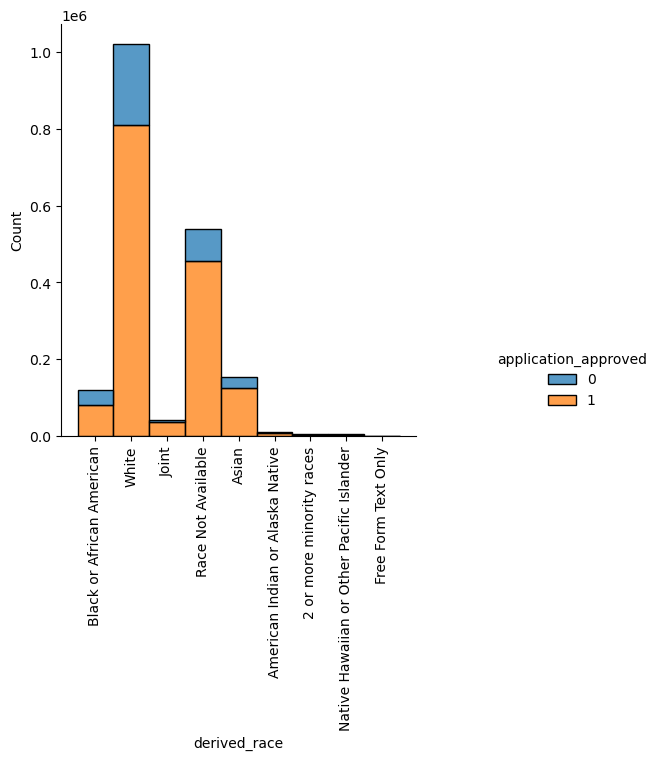

In [38]:
sns.displot(df_selected.loc[:, ['application_approved', 'derived_race']], x="derived_race", hue="application_approved", multiple="stack")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Independent Variables of Interest

In [22]:
df_selected.derived_sex.value_counts(dropna=False)

derived_sex
Joint                604804
Male                 563504
Sex Not Available    376616
Female               352203
Name: count, dtype: int64

In [23]:
df_selected.derived_loan_product_type.value_counts(dropna=False)



derived_loan_product_type
Conventional:First Lien          1267211
Conventional:Subordinate Lien     286307
FHA:First Lien                    218601
VA:First Lien                     120185
FSA/RHS:First Lien                  4258
FSA/RHS:Subordinate Lien             443
FHA:Subordinate Lien                 115
VA:Subordinate Lien                    7
Name: count, dtype: int64

In [24]:
df_selected.derived_race.value_counts(dropna=False)

derived_race
White                                        1021357
Race Not Available                            539609
Asian                                         153335
Black or African American                     120668
Joint                                          42388
American Indian or Alaska Native               11269
Native Hawaiian or Other Pacific Islander       4163
2 or more minority races                        3909
Free Form Text Only                              429
Name: count, dtype: int64

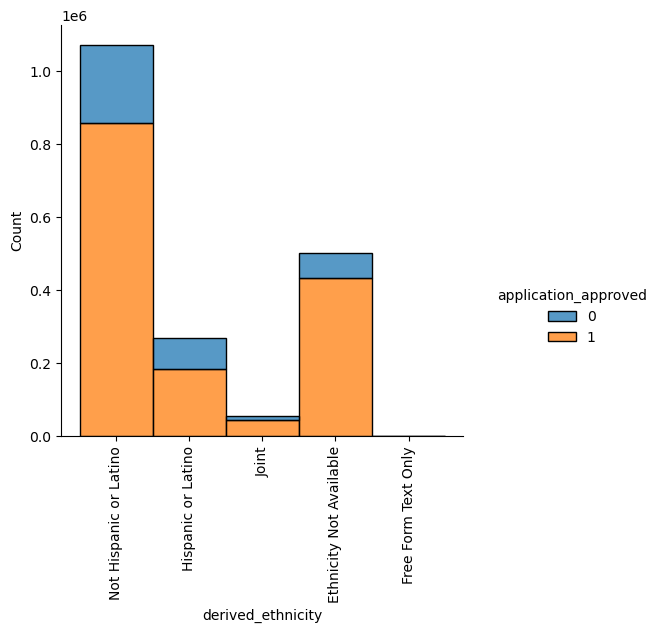

In [39]:
sns.displot(df_selected.loc[:, ['application_approved', 'derived_ethnicity']], x="derived_ethnicity", hue="application_approved", multiple="stack")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [25]:
df_selected.derived_ethnicity.value_counts(dropna=False)

derived_ethnicity
Not Hispanic or Latino     1071830
Ethnicity Not Available     501014
Hispanic or Latino          268179
Joint                        55261
Free Form Text Only            843
Name: count, dtype: int64

In [26]:
# Values:

#     1 - Preapproval requested
#     2 - Preapproval not requested

df_selected.preapproval.value_counts(dropna=False)

preapproval
2    1840170
1      56957
Name: count, dtype: int64

In [27]:
# Values:

#     1 - Home purchase
#     2 - Home improvement
#     31 - Refinancing
#     32 - Cash-out refinancing
#     4 - Other purpose
#     5 - Not applicable


df_selected.loan_purpose.value_counts(dropna=False)

loan_purpose
1     1070001
32     304760
31     213629
2      162504
4      132990
5       13243
Name: count, dtype: int64

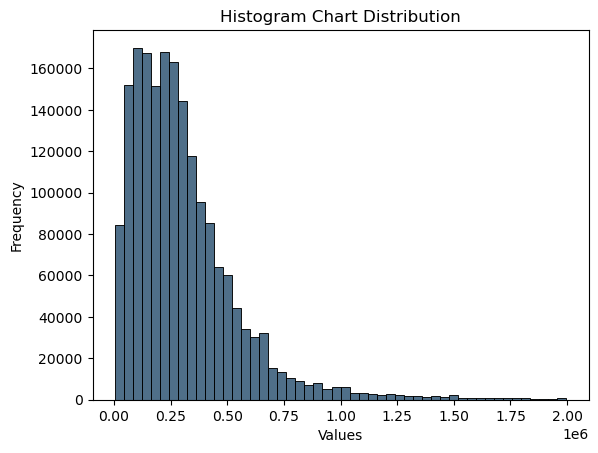

In [28]:
# Create a histogram using Seaborn
sns.histplot(df_selected[df_selected.loc[:,'loan_amount']<2000000].loan_amount,color = '#143F62', bins= 50)  # kde=False disables the kernel density estimation
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Chart Distribution')
plt.show()

In [29]:
df_selected.interest_rate.value_counts(dropna=False).head(25)

interest_rate
NaN       380644
Exempt     35898
4.75       27473
3.75       27014
3.25       25391
5.5        24157
5.25       23853
3.875      23687
5.625      23290
4.25       23195
5.25       22941
3.75       22364
4.5        22302
4.75       22277
4.875      21861
4.25       21517
5.5        21192
3.25       21149
3.875      20524
5.125      19655
3.5        19583
5.625      19181
4.5        19128
3.375      19110
5.75       18755
Name: count, dtype: int64

In [30]:
df_selected.loan_term.value_counts(dropna=False).head(25)

loan_term
360       750476
360       414945
360.0     167173
180        75173
300        61323
180        48000
240        44895
240        42993
300        39092
Exempt     35657
NaN        33792
120        18664
180.0      18129
120        16904
480.0      12494
36.0       11359
276         9857
240.0       9680
300.0       6883
120.0       5960
60          4562
12          3922
1.0         3426
60.0        3351
372.0       3319
Name: count, dtype: int64

In [31]:
df_selected.applicant_age.value_counts(dropna=False).head(25)

applicant_age
35-44    454038
25-34    360312
45-54    359342
55-64    246910
8888     217796
65-74    126925
<25       46976
>74       43868
8888      40960
Name: count, dtype: int64

In [34]:
df_selected.debt_to_income_ratio.value_counts(dropna=False).head(25)

debt_to_income_ratio
NaN         361242
20%-<30%    223743
30%-<36%    222979
50%-60%     143935
>60%        105272
<20%         90372
44           63132
42           60433
49           59540
43           55039
41           54470
40           51893
39           50524
45           48528
38           47467
48           46440
37           45777
47           43607
46           43550
36           43275
Exempt       35909
Name: count, dtype: int64

### Should we drop or normailize the income?

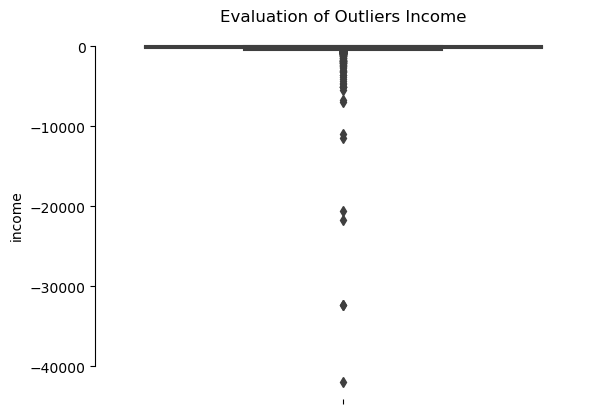

In [32]:
sns.boxplot( y="income",data=df_selected[df_selected.loc[:,'income']<0])
plt.title('Evaluation of Outliers Income')
sns.despine(trim=True)

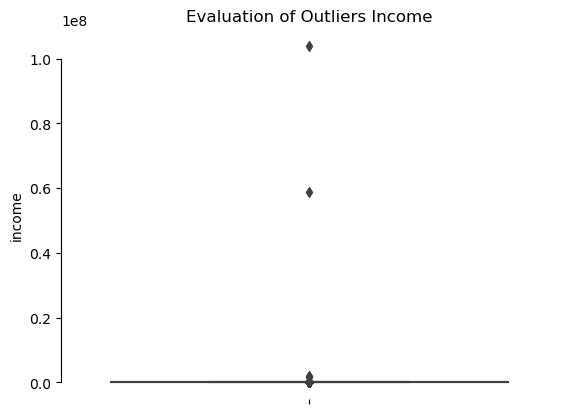

In [33]:
sns.boxplot( y="income",data=df_selected[df_selected.loc[:,'income']>0])
plt.title('Evaluation of Outliers Income')
sns.despine(trim=True)

In [40]:
df_selected.to_csv(r"...\Desktop\02_2022_HMDA_Filter.csv", index=False)